# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [49]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

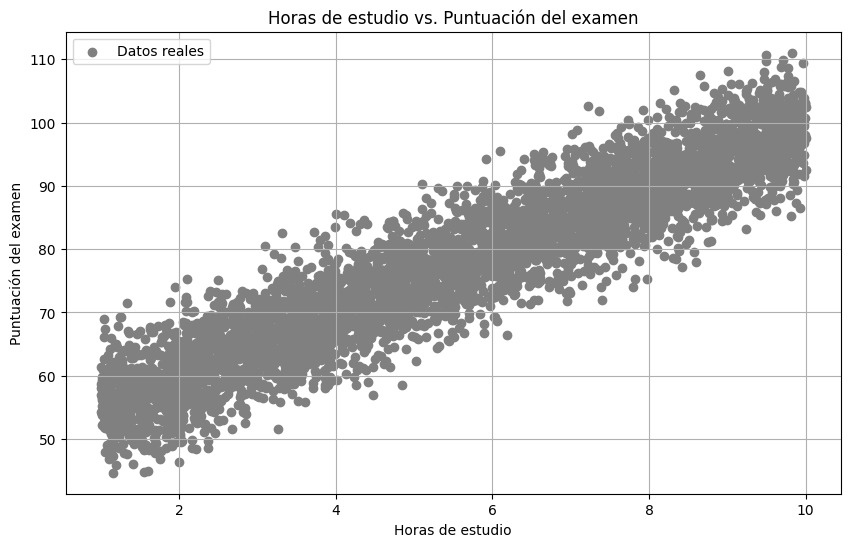

In [50]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='grey', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR
# Dividir los datos en entrenamiento y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [52]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    cost = np.mean((y_true - y_pred) ** 2)
    return cost

def train_regression(X_train, y_train, X_val, y_val, lr=0.01, epochs=1000):
    """
    Entrena un modelo de regresión lineal usando gradiente descendente.
    """
    # 1. Inicializar los coeficientes (pesos) w y b
    n_samples = X_train.shape[0]
    n_features = 1
    w = np.zeros(n_features)
    b = 0
    
    # 2. bucle que itere por epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []
    
    for epoch in range(epochs):
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = np.dot(X_train, w) + b
        
        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)
        
        # 5. Calcular los gradientes para los pesos w y b
        error = y_pred_train - y_train
        # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
        db = (2 / n_samples) * np.sum(error)
        # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
        dw = (2 / n_samples) * np.dot(X_train.T, error)
        
        # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
        w -= lr * dw
        b -= lr * db
        
        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val = np.dot(X_val, w) + b
        
        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)
        
    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [53]:
# Hiperparámetros
lr = 0.01
epochs = 1000

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

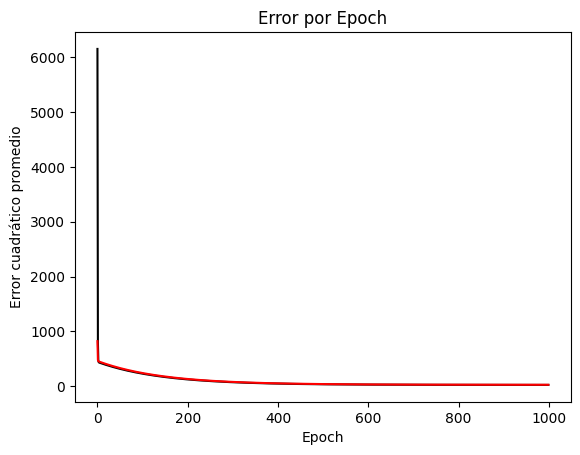

In [54]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-k')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 25.82429119982195


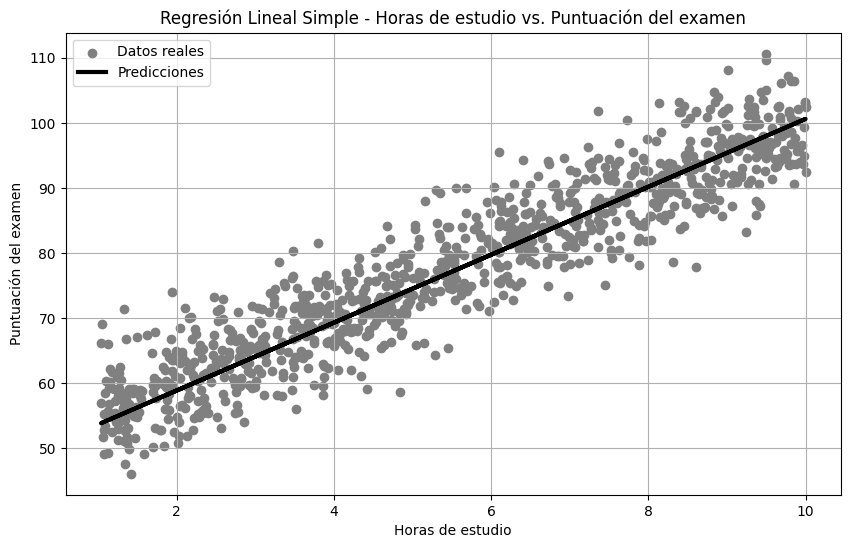

In [55]:
X_test = X_test.reshape(-1, 1)

# Realizar predicciones en test
y_pred = np.dot(X_test, w) + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='grey', label='Datos reales')
plt.plot(X_test, y_pred, color='black', linewidth=3, label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.82429119982195
MAE en el conjunto de test: 4.002442890927671
R^2 en el conjunto de test: 0.8704383423318994
MAPE en el conjunto de test: 5.300717636619199


## Implementación de la regresión lineal usando sklearn

In [57]:
# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [58]:
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Costo del modelo: 25.24963738333083


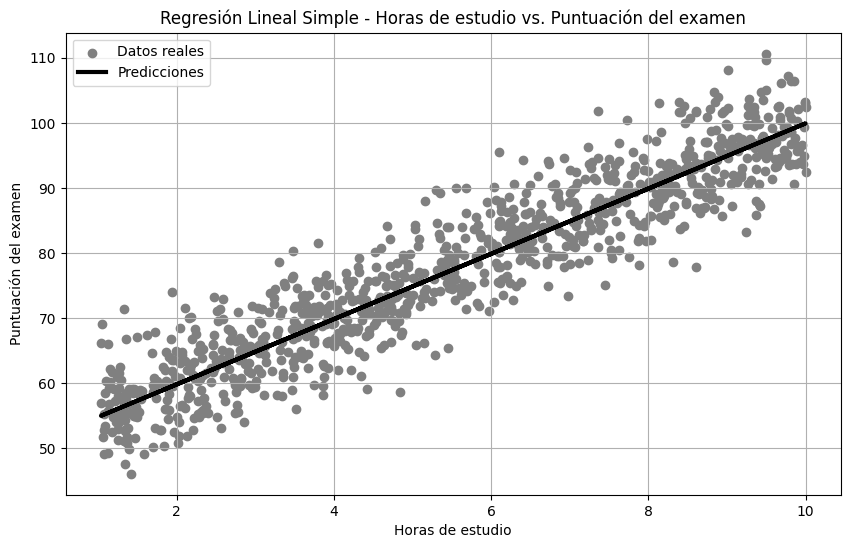

In [59]:
# Realizar predicciones en test
y_pred = model.predict(X_test)

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='grey', label='Datos reales')
plt.plot(X_test, y_pred, color='black', linewidth=3, label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.24963738333083
MAE en el conjunto de test: 3.954489749404063
R^2 en el conjunto de test: 0.8733214069811396
MAPE en el conjunto de test: 5.257659436831548


## Comparación de parámetros obtenidos

In [61]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.442302907846155
Coeficiente de pendiente (w) - Manual: [5.21726595]
Coeficiente de intercepción (b) - Scikit-learn: 49.79376934674988
Coeficiente de pendiente (w) - Scikit-learn: 5.014015542462286
